In [451]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [452]:
data = pd.read_csv('student.csv')

data.info()
data.shape
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Math       1000 non-null int64
Reading    1000 non-null int64
Writing    1000 non-null int64
dtypes: int64(3)
memory usage: 23.5 KB


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [453]:
math = data['Math'] 
read = data['Reading']
write = data['Writing']

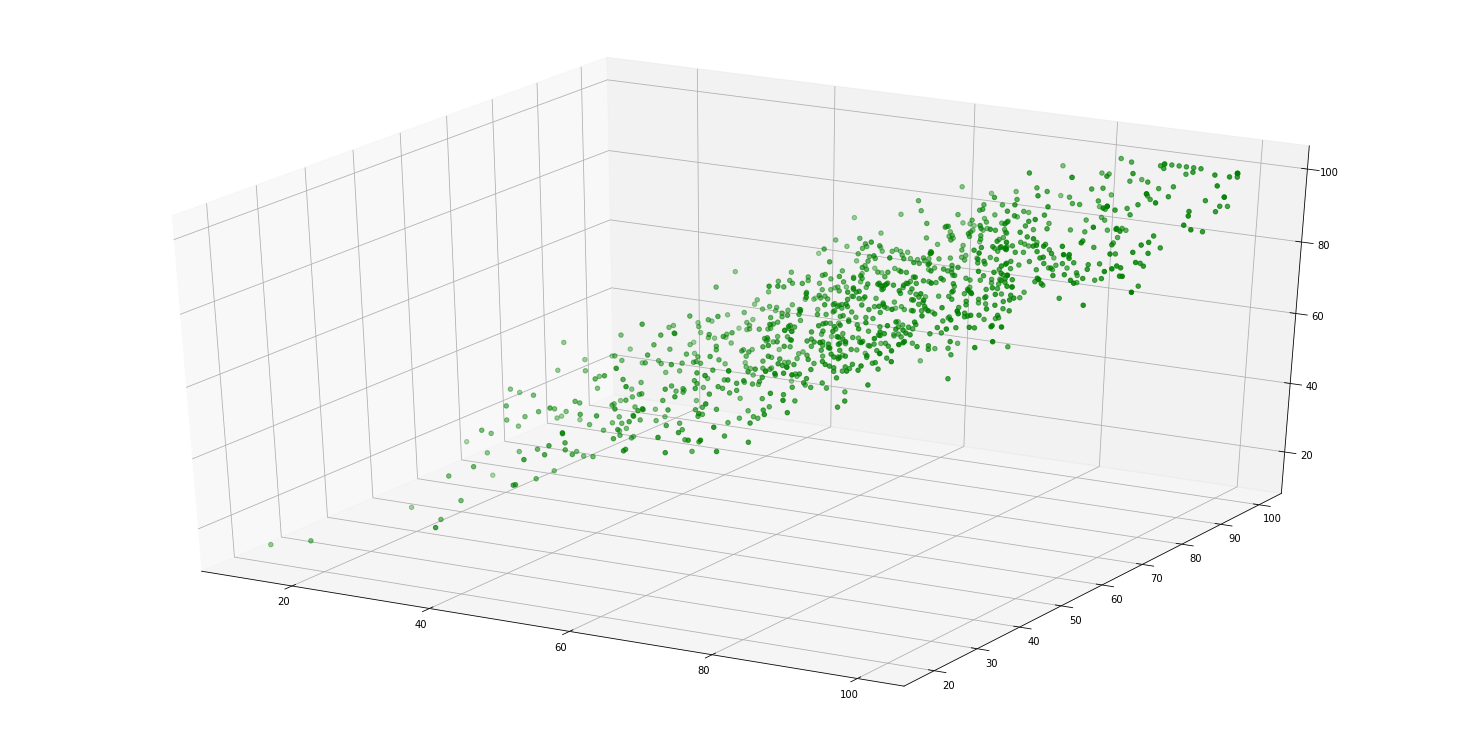

In [454]:
#now lets plot the values 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='green')
plt.show()

In [455]:
#defining the values of X Y AND B 

#intitally B = 0;

# Bj = Bj - (a  * 1/n * SUM(((Hb(Xi) - Yi)) * Xj) )

# cost funtion, J = 1/2n * (Hb(Xi)-Yi)^2

# Hb(x) = B(transpose) * x

#a= learning rate = 0.001



In [456]:
#defining the values of X Y AND B

n = len(math)
x0 = np.ones(m)
X = np.array([x0, math,  read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001 #learning rate

In [457]:
#defining cost function

def cost_fun(X, Y, B):
    n = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * n)
    return J

In [458]:
cost = cost_fun(X, Y, B)
print(cost)

2470.11


In [459]:
# reducing the cost
# H(Hypothesis) = B(transpose) . X
# L(loss) = H - Y
# gradient(gradient decent update) = Bj - alpha( (H(x) - Y) * Xj)/n


def gradient_decent(X, Y, B, alpha, iter):
    
    for _ in range(iter):
        H = X.dot(B)
        L = H - Y
        gradient = X.T.dot(L) / n
        B = B - (alpha * gradient)
        
    return B
          

In [460]:
new_B = gradient_decent(X, Y, B, alpha, 100000)

print(new_B)

[-0.47889172  0.09137252  0.90144884]


In [461]:
# ROOT MEAN SQUARE ERROR
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


Y_pred = X.dot(new_B)

print("RMSE")
print(rmse(Y, Y_pred))
print("R2 Score")
print(r2_score(Y, Y_pred))

RMSE
4.577143972727789
R2 Score
0.9097223273061553


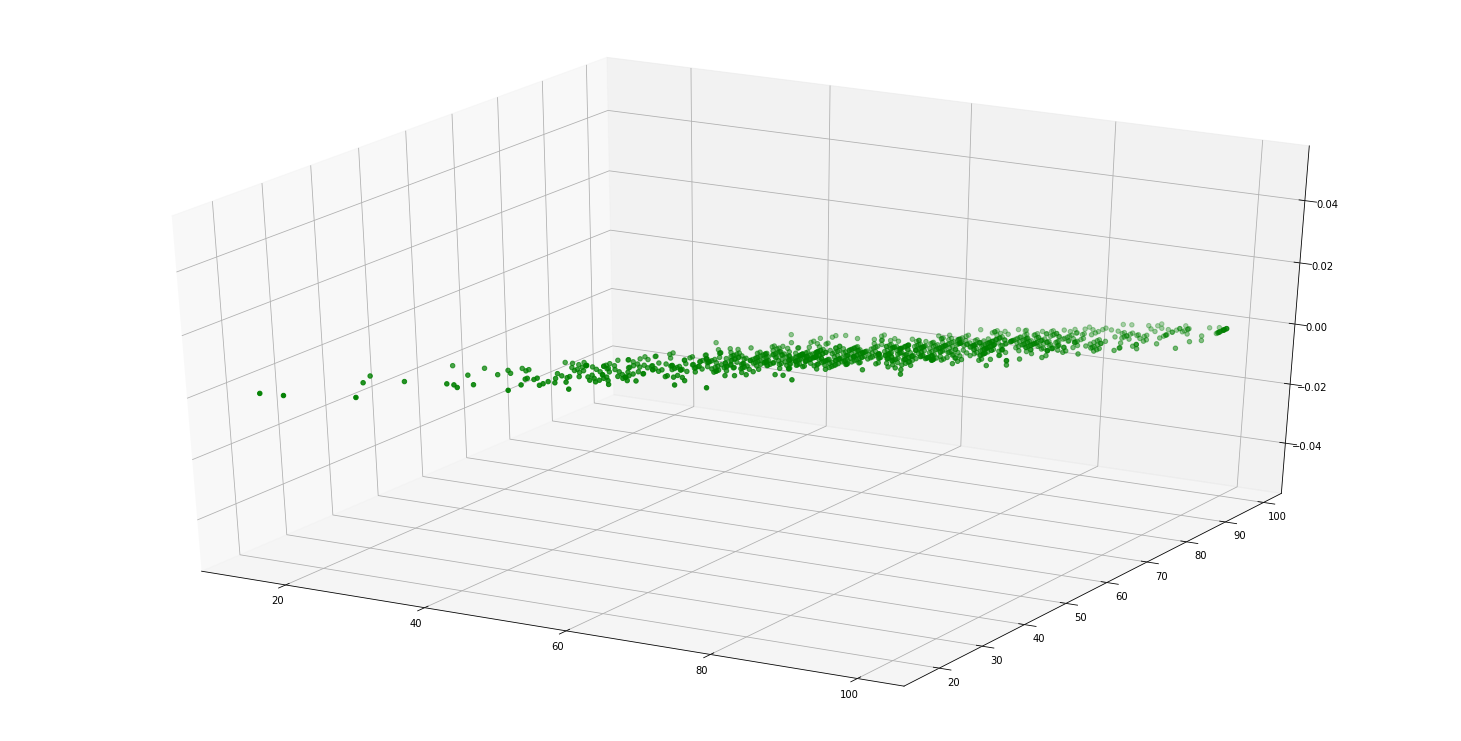

In [462]:
#now lets plot the values 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Y,Y_pred, color='green')
plt.show()